In [ ]:
8

8

Prediction on vaccinated died and non-vacinated died in 2022 in London and boroughs.

1. Download tables
2. Decide on missing values (skip it or fill it)
3. Replace where possible string to numerical format
4. Bring data columns to single format
5. Split data (70/20/10) train/test/validate

In [ ]:
#checking missing values
#nans = data.shape[0] - data.dropna().shape[0]
#print ("%d rows have missing values in the data" %nans)

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/VonnieC1/CFG-Final-Group-Project-/main/data/machine_learning_data.csv")
data

,code,name,date,dailyCases,dailyDeaths,Vaccinations
0,E12000007,London,27/10/2022,3969.0,NaN,NaN
1,E12000007,London,26/10/2022,0.0,NaN,203.0
2,E12000007,London,25/10/2022,0.0,NaN,231.0
3,E12000007,London,24/10/2022,0.0,1.0,241.0
4,E12000007,London,23/10/2022,0.0,1.0,70.0
...,...,...,...,...,...,...
958,E12000007,London,13/03/2020,NaN,6.0,NaN
959,E12000007,London,12/03/2020,NaN,6.0,NaN
960,E12000007,London,11/03/2020,NaN,3.0,NaN
961,E12000007,London,10/03/2020,NaN,1.0,NaN


In [ ]:
#checking columns that has missing values
data.isnull().sum()

code              0
name              0
date              0
dailyCases       39
dailyDeaths       3
Vaccinations    275
dtype: int64

In [ ]:
#filling missing values with '0'

#dailyCases
data.dailyCases.value_counts(sort=True)
data.dailyCases.fillna(0,inplace=True)

#dailyDeaths
data.dailyDeaths.value_counts(sort=True)
data.dailyDeaths.fillna(0,inplace=True)

#Vaccinations
data.Vaccinations.value_counts(sort=True)
data.Vaccinations.fillna(0,inplace=True)


In [ ]:
data.isnull().sum()

code            0
name            0
date            0
dailyCases      0
dailyDeaths     0
Vaccinations    0
dtype: int64

In [ ]:
data

,code,name,date,dailyCases,dailyDeaths,Vaccinations
0,E12000007,London,27/10/2022,3969.0,0.0,0.0
1,E12000007,London,26/10/2022,0.0,0.0,203.0
2,E12000007,London,25/10/2022,0.0,0.0,231.0
3,E12000007,London,24/10/2022,0.0,1.0,241.0
4,E12000007,London,23/10/2022,0.0,1.0,70.0
...,...,...,...,...,...,...
958,E12000007,London,13/03/2020,0.0,6.0,0.0
959,E12000007,London,12/03/2020,0.0,6.0,0.0
960,E12000007,London,11/03/2020,0.0,3.0,0.0
961,E12000007,London,10/03/2020,0.0,1.0,0.0


In [ ]:
#filtering on year 2021
data['date'] = pd.to_datetime(data['date'], format= '%d/%m/%Y')
data_2021 = data.loc[(data['date'] >= '01/01/2021')& (data['date'] <= '31/12/2021')]
data_2021 = data_2021.iloc[::-1]
data_2021

,code,name,date,dailyCases,dailyDeaths,Vaccinations
664,E12000007,London,2021-01-01,15089.0,137.0,2887.0
663,E12000007,London,2021-01-02,13178.0,146.0,2947.0
662,E12000007,London,2021-01-03,14212.0,138.0,855.0
661,E12000007,London,2021-01-04,11370.0,162.0,4465.0
660,E12000007,London,2021-01-05,14700.0,177.0,9715.0
...,...,...,...,...,...,...
304,E12000007,London,2021-12-27,22224.0,27.0,3748.0
303,E12000007,London,2021-12-28,22981.0,25.0,4010.0
302,E12000007,London,2021-12-29,22727.0,26.0,6015.0
301,E12000007,London,2021-12-30,24320.0,38.0,5523.0


In [ ]:
#dropping irrelevant columns
data_2021 = data_2021.drop(['code'], axis=1)
data_2021 = data_2021.drop(['name'], axis=1)
data_2021.head()

,date,dailyCases,dailyDeaths,Vaccinations
664,2021-01-01,15089.0,137.0,2887.0
663,2021-01-02,13178.0,146.0,2947.0
662,2021-01-03,14212.0,138.0,855.0
661,2021-01-04,11370.0,162.0,4465.0
660,2021-01-05,14700.0,177.0,9715.0


In [ ]:
#splitting the data into train and test parts
from sklearn.model_selection import train_test_split

# Split sizes
train_size = 0.7
val_size = 0.2
test_size = 0.1

y = data_2021[['Vaccinations']] # our feature(s)
X = data_2021['dailyDeaths'] # our target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=5) #random state means train test will be the same every time for those states

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(328,)
(37,)
(328, 1)
(37, 1)


In [ ]:
#importing all the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from matplotlib.lines import Line2D

In [ ]:
#LSTM Prediction Model. Data preparation
data_2021.index = data_2021['date']
#data_2021 = data_2021.fillna(0)
df = data_2021.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(data_2021)),columns=['date','dailyDeaths'])
for i in range(0,len(data)):
    data["date"][i]=data_2021['date'][i]
    data["dailyDeaths"][i]=data_2021["dailyDeaths"][i]
data.head()

,date,dailyDeaths
0,2021-01-01 00:00:00,137.0
1,2021-01-02 00:00:00,146.0
2,2021-01-03 00:00:00,138.0
3,2021-01-04 00:00:00,162.0
4,2021-01-05 00:00:00,177.0


In [ ]:
#Min-Max Scaler
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.date
data.drop("date",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:328,:]
valid_data=final_data[328:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [ ]:
#In this step, we are defining the Long Short-Term Memory model.
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [ ]:
#Prediction Function
predicted_deaths=lstm_model.predict(X_test)
predicted_deaths=scaler.inverse_transform(predicted_deaths)

2/2 [==============================] - 1s 7ms/step


In [ ]:
predicted_deaths

array([[-5.797139 ],
       [-5.530298 ],
       [-5.4104333],
       [-5.6627107],
       [-2.7080603],
       [-6.020189 ],
       [-3.805355 ],
       [-5.797139 ],
       [-2.7080603],
       [-5.3093123],
       [-5.300837 ],
       [ 0.       ],
       [-2.7080603],
       [-7.060931 ],
       [-3.805355 ],
       [-1.4180739],
       [ 0.       ],
       [-6.00178  ],
       [-6.020189 ],
       [ 0.       ],
       [-5.93681  ],
       [-5.1236897],
       [-5.530298 ],
       [-5.530298 ],
       [-5.4104333],
       [-5.530298 ],
       [-5.783122 ],
       [-6.1563253],
       [-5.121905 ],
       [-5.2299356],
       [-6.0201893],
       [-6.0201893],
       [-5.91763  ],
       [-5.1729674],
       [ 0.       ],
       [-5.93681  ],
       [-5.3077602]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


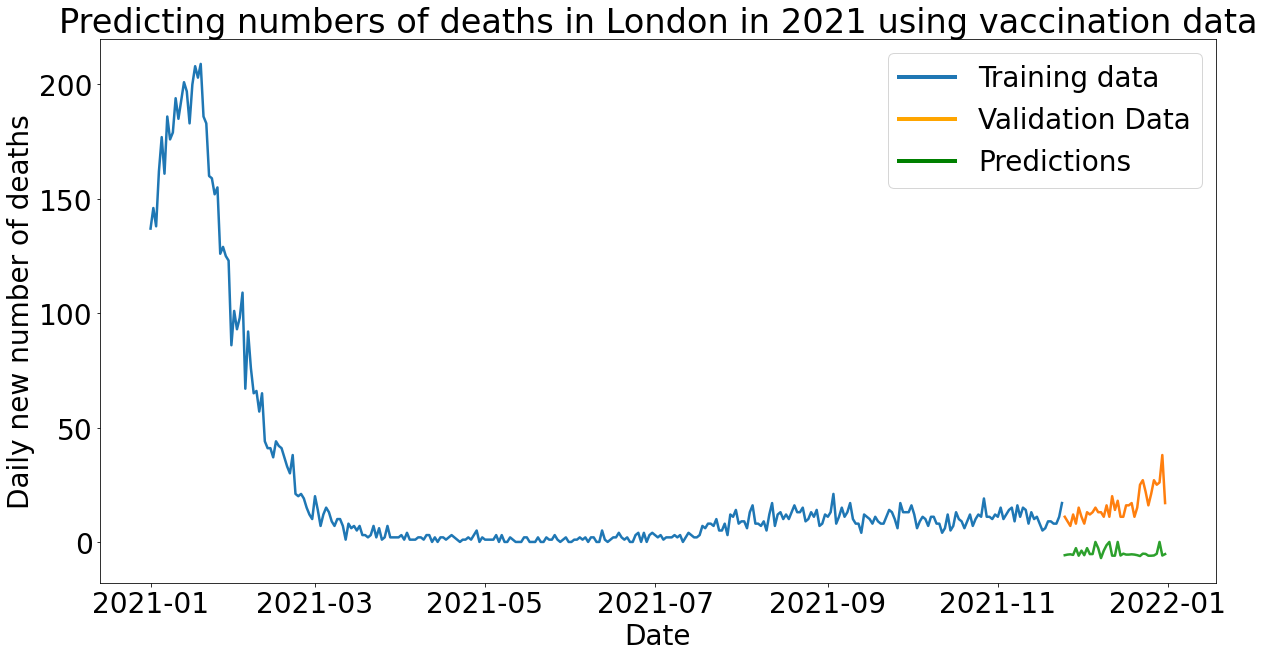

In [ ]:
#Prediction Result
train_data=data[:328] #parameters of train data
valid_data=data[328:] #parameters of valid data
valid_data['Predictions']=predicted_deaths 
plt.plot(train_data["dailyDeaths"], linewidth = 2.5) #Plotting existing data
plt.plot(valid_data[['dailyDeaths',"Predictions"]], linewidth = 2.5) #Plotting predictions and validation data
plt.xlabel('Date')
plt.ylabel('Daily new number of deaths')
plt.title('Predicting numbers of deaths in London in 2021 using vaccination data')
plt.rcParams.update({'font.size': 28}) #change font size

legend_lines = [Line2D([0], [0], lw=4),
                Line2D([0], [0], color ='orange',lw=4),
                Line2D([0], [0], color = 'green', lw=4)] #making legend lines manually
plt.legend(legend_lines, ['Training data', 'Validation Data', 'Predictions'])
plt.show()

Our model underpredicts the number of deaths at the end of 2021. The model itself is not performing well using the given data. It could be becuase vaccination uptake is not the only factor affecting deaths, so a model that includes further parameters/terms would predict better - for example hospital capacities, social mixing etc. Another reason for underperformance may be the amount of data used to train the model or bias induced by the extreme downwards trend in our training data. 

Comparing our predictions in new deaths to those made by Office of National Statistics for weekly deaths, similar predictions were made for the end of 2021.
https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/articles/coronaviruscovid19latestinsights/deaths
Other predictions made by UCL were also similar 
https://www.fil.ion.ucl.ac.uk/spm/covid-19/forecasting/
In contrast this article shows a contrasting patterns: 
https://covid19.healthdata.org/united-kingdom?view=cumulative-deaths&tab=trend